In [1]:
import torch
import torch.nn as nn

In [2]:
torch.__version__

'2.1.0+cu121'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
!nvidia-smi

Mon Mar 11 15:46:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Get Data

Our dataset is a subset of the Food 101 dataset.


Food101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing).
Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing).


Why do this?


When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.


The whole point is to speed up how fast you can experiment.

In [5]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path/"pizza-steak-sushi"

#"Creating directory : "
if image_path.is_dir():
  print(f" {image_path} The path aldready exists")
else:
  print(f"{image_path} doesn't exist , creating one")
  image_path.mkdir(parents = True , exist_ok = True)

with open(data_path / "pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading , pizza , steak , sushi data..")
  f.write(request.content)

with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip" , "r") as zip_ref:
  print("Unzipping : ")
  zip_ref.extractall(image_path)

data/pizza-steak-sushi doesn't exist , creating one
Unzipping : 


#Data preparation and data Exploration

In [6]:
import os

def walk_through_dir(dir_path):
  for dirpath,dirname,filename in os.walk(dir_path):
    print(f"{len(dirname)} directories and {len(filename)} images in {dirpath}")

In [7]:
walk_through_dir(image_path)

2 directories and 0 images in data/pizza-steak-sushi
3 directories and 0 images in data/pizza-steak-sushi/train
0 directories and 78 images in data/pizza-steak-sushi/train/pizza
0 directories and 75 images in data/pizza-steak-sushi/train/steak
0 directories and 72 images in data/pizza-steak-sushi/train/sushi
3 directories and 0 images in data/pizza-steak-sushi/test
0 directories and 25 images in data/pizza-steak-sushi/test/pizza
0 directories and 19 images in data/pizza-steak-sushi/test/steak
0 directories and 31 images in data/pizza-steak-sushi/test/sushi


In [8]:
#Set up train and testing paths

train_dir = image_path/"train"
test_dir = image_path/"train"

train_dir , test_dir

(PosixPath('data/pizza-steak-sushi/train'),
 PosixPath('data/pizza-steak-sushi/train'))

#Visualizing image

1. Get all of the image paths


2. Pick a random image path using Python's random.choice()


3. Get the image class name using pathlib. Path.parent.stem


4. Since we're working with images, let's open the image with Python's PIL


5. We'll then show the image and print metadata

Random image path : data/pizza-steak-sushi/train/sushi/2017378.jpg
Image class : sushi
Image height : 512
Image width : 512


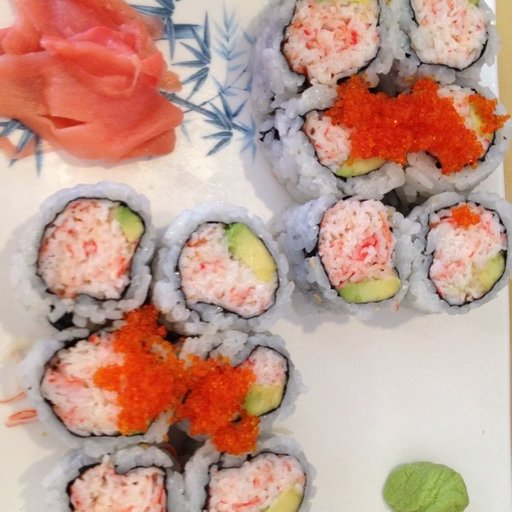

In [29]:
import random
from PIL import Image

#Setting up reproducability
random.seed(42)

#Get all image path
image_path_list = list(image_path.glob("*/*/*"))

#Picking a random image path
random_image_path = random.choice(image_path_list)

#Get the class name of the image
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
print(f"Random image path : {random_image_path}")
print(f'Image class : {image_class}')
print(f'Image height : {img.height}')
print(f"Image width : {img.width}")
img

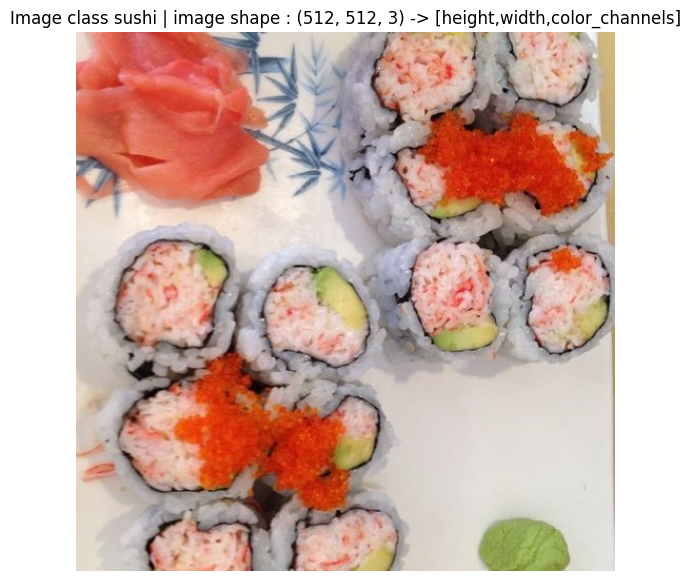

In [33]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class {image_class} | image shape : {img_as_array.shape} -> [height,width,color_channels]")
plt.axis(False);

#Transforming data to tensors

1. Turn your target data into tensors (in our case, numerical representation of our images).


2. Turn it into a torch.utils.data.Dataset and subsequently a torch.utils.data.DataLoader, we'll call these Dataset and
DataLoader.

In [36]:
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

In [38]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [41]:
data_transform(img).shape

torch.Size([3, 64, 64])